# Proyecto de mineria de datos 

> - Ian Timothy Henry Suárez | A01701578
> - Fernando Guevara Moreno | A00828723

# Introducción 

En este notebook se encuentra el análisis de los datos para el proyecto de minería de datos. 

# Preprosesamiento de los datos

In [14]:
# Importamos las librerías

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
# Cargamos los datos

data = pd.read_csv('fertility_Diagnosis.txt', names=['Season', 'Age', 'Childish diseases', 'Accident', 'Surgical intervention', 'High fevers in the last year', 'Frequency of alcohol consumption', 'Smoking habit', 'Number of hours spent sitting per day', 'Output'])
data

,Season,Age,Childish diseases,Accident,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [3]:
# Obtenemos informacion de la base de datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Season                                 100 non-null    float64
 1   Age                                    100 non-null    float64
 2   Childish diseases                      100 non-null    int64  
 3   Accident                               100 non-null    int64  
 4   Surgical intervention                  100 non-null    int64  
 5   High fevers in the last year           100 non-null    int64  
 6   Frequency of alcohol consumption       100 non-null    float64
 7   Smoking habit                          100 non-null    int64  
 8   Number of hours spent sitting per day  100 non-null    float64
 9   Output                                 100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
# Codificamos la variable de salida Normal - 0, Alterado - 1

encoder = LabelEncoder()
out = encoder.fit_transform(data['Output'])

In [5]:
# Separamos las variables de entrada y de salida

x = data.drop('Output', axis=1)
y = out

In [6]:
# Separamos los datos de entrenamiento y de validacion

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

# Arboles de decisión - Fer

Este algoritmo nos permite crear una serie de nodos los cuales a través de proposiciones de verdadero y falso, se va clasificando el dato en cuestión hasta llegar a un nodo final. El uso de los parámetros es impredecible en este algoritmo ya que dependiendo si el objeto a clasificar cumple o no con estos, da lugar a un nuevo nodo con un nuevo parámetro a cumplir. Si bien es útil al momento de clasificar y nos da un buen porcentaje de precisión comparado con otros algoritmos, muchas veces resulta ineficiente por la excesiva cantidad de nodos que puede llegar a tener.

In [7]:
def get_cm(max_leaf_nodes, x_train, x_test, y_train, y_test):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test,y_pred)
    print (cm)
    print (cr)

In [8]:
candidate_max_leaf_nodes = [10,20,40,80,160]
relation0 = {max_leaf_nodes: get_cm(max_leaf_nodes, x_train, x_test, y_train, y_test) for max_leaf_nodes in  candidate_max_leaf_nodes}
relation0

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

{10: None, 20: None, 40: None, 80: None, 160: None}

In [9]:
model = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print (cm)
print (cr)

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [10]:
pruebas = x.iloc[0:10,:]
predicciones = model.predict(pruebas)
reales = y[0:10]

print(predicciones)
print(reales)

[0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 1 0 0 0 0 0]


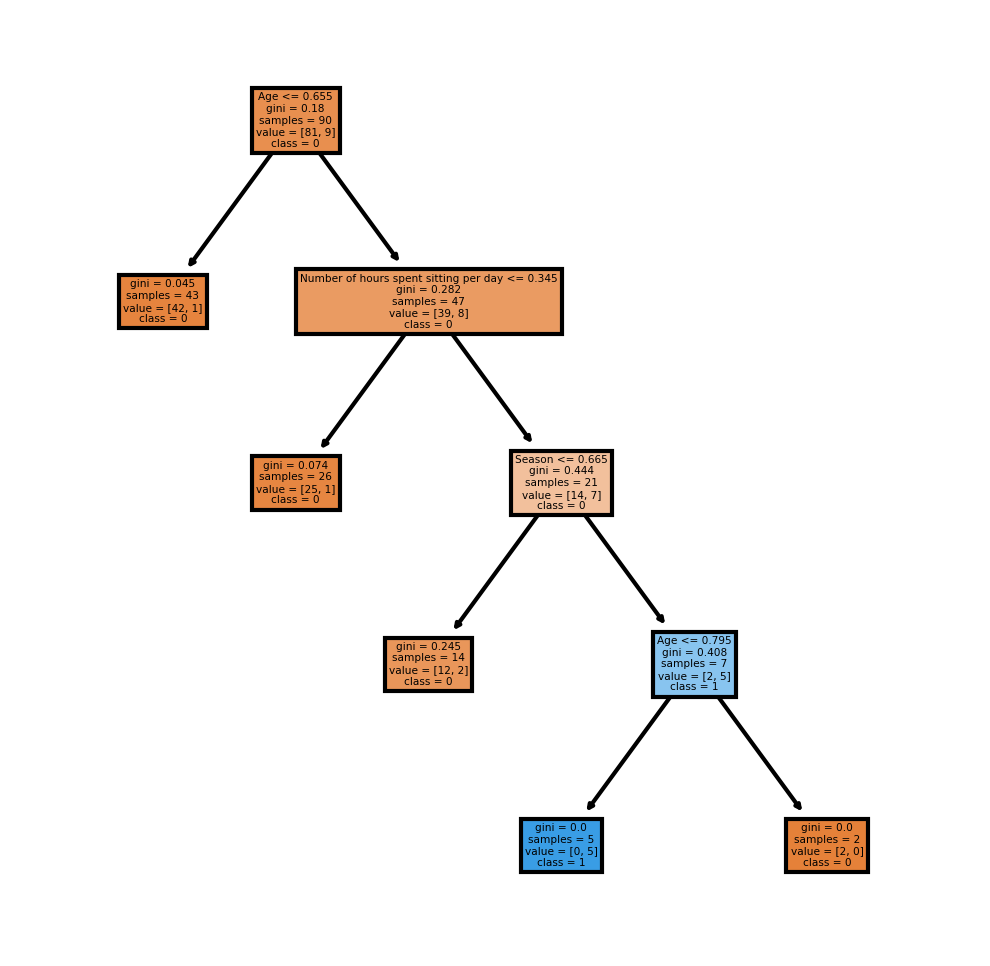

In [15]:
fe_names = list(x.columns)
ta_names = ['0','1']

#Tamaño de los árboles
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

# Crear los datos
tree.plot_tree(model, filled=True,
                          feature_names=fe_names,
                          class_names=ta_names)

fig.savefig('imagename.png')

In [16]:
data.loc[0]

Season                                  -0.33
Age                                      0.69
Childish diseases                           0
Accident                                    1
Surgical intervention                       1
High fevers in the last year                0
Frequency of alcohol consumption          0.8
Smoking habit                               0
Number of hours spent sitting per day    0.88
Output                                      N
Name: 0, dtype: object

# SVM - Ian

    Support Vector Machine son una serie de algoritmos de aprendizaje supervisado utilizado en machine learning principalmente para clasificación. Consiste en encontrar la mayor distancia entre grupos y plantear una línea que separe los grupos de manera óptima. A esta línea se le conoce comúnmente como un hiperplano. Support Vector Machine se utiliza con datos que son linealmente separables. Sin embargo, puede modificarse para que pueda ser implementado con otro tipo de datos en dimensiones diferentes, de tal manera que se cumpla con las características lineales. Existen distintos kernels que nos permiten trabajar con datos que no son linealmente separables. Dentro de estos se encuentran los kernels polinomiales de distintos grados, el kernel RBF o gaussiano y el kernel sigmoidal.

In [17]:
# Primero utilizamos el modelo lineal

svclassifierLinear = SVC(kernel='linear', random_state=3)
svclassifierLinear.fit(x_train, y_train)
l_preds = svclassifierLinear.predict(x_test)
confusion_matrix(y_test, l_preds)

array([[7, 0],
       [3, 0]], dtype=int64)

In [18]:
# Probamos con el sigmoigal

svclassifierSigmoid = SVC(kernel='sigmoid', random_state=2)
svclassifierSigmoid.fit(x_train, y_train)
s_preds = svclassifierSigmoid.predict(x_test)
confusion_matrix(y_test, s_preds)

array([[7, 0],
       [3, 0]], dtype=int64)

In [19]:
# Probamos con el Gaussiano

svclassifierRBF = SVC(kernel='rbf', random_state=10)
svclassifierRBF.fit(x_train, y_train)
r_preds = svclassifierRBF.predict(x_test)
confusion_matrix(y_test, r_preds)

array([[7, 0],
       [3, 0]], dtype=int64)

In [20]:
#Probamos con el polinomial

svclassifierPoly = SVC(kernel='poly', degree=15, random_state=5)
svclassifierPoly.fit(x_train, y_train)
p_preds = svclassifierPoly.predict(x_test)
confusion_matrix(y_test, p_preds)

array([[6, 1],
       [2, 1]], dtype=int64)

Podemos observar que las mejores predicciones fueron obtenidas con el kernel polinomial de grado 15

# Redes Neuronales Artificiales 

    Las redes neuronales artificiales son modelos para el análisis de datos que buscan asimilar su funcionamiento al de una red neuronal natural. Están compuestas por nodos y conexiones entre ellos. Análogamente a las neuronas y a las conexiones que se crean entre ellas por medio de la sinapsis. Las conexión entre nodos representan funciones que van modificando la información hasta obtener el resultado deseado. Los nodos aportan un peso para que pueda seguirse modificando la información. Las redes neuronales artificiales están compuestas por capas que pueden dividirse en tres categorías; capas de entrada, capas ocultas y capas de salida. Nosotros podemos establecer la dimensión de nuestra red neuronal artificial en la cantidad de capas ocultas y en la cantidad de nodos en cada capa. Las redes neuronales artificiales son una herramienta muy poderosa para obtener predicciones, sin embargo son muy sensibles a cómo son calibradas. Es por eso que es importante ser cuidadosos cuando estemos escogiendo los parámetros que utilizaremos para hacerlo y con la base de entrenamiento que usaremos. Es importante entrenar la red antes de obtener predicciones.

# Redes neuronales artificiales - Fer

In [21]:
mlp = MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(10,15))
mlp

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 15), solver='sgd')

In [22]:
mlp.fit(x_train, y_train)

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 15), solver='sgd')

In [23]:
pred = mlp.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
print(confusion_matrix(y_test,pred))
print (classification_report(y_test,pred))

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Redes neuronales artificiales - Ian

In [25]:
# Creamos una función para evaluar el modelo con diferentes solvers

def get_val(par, x_train, x_test, y_train, y_test):
    red_neuronal = MLPClassifier(solver=par, hidden_layer_sizes=(6,3), random_state=1)
    red_neuronal.fit(x_train, y_train)
    y_preds = red_neuronal.predict(x_test)
    print(confusion_matrix(y_test, y_preds))
    print(classification_report(y_test,y_preds))

In [26]:
pars = ['lbfgs', 'sgd', 'adam']
relation = {par: get_val(par, x_train, x_test, y_train, y_test) for par in pars}
relation

[[6 1]
 [2 1]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.50      0.33      0.40         3

    accuracy                           0.70        10
   macro avg       0.62      0.60      0.60        10
weighted avg       0.68      0.70      0.68        10

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python

{'lbfgs': None, 'sgd': None, 'adam': None}

Por las matrices de confusión nos podemos dar cuenta que el solver lbfgs es el que se ajusta mejor a esta base de datos. Ahora intentaremos cambiar la función de activación para obtener mejores resultados. 

In [27]:
def get_val2(act, x_train, x_test, y_train, y_test):
    red_neuronal = MLPClassifier(solver='lbfgs', activation=act, hidden_layer_sizes=(6,3), random_state=1)
    red_neuronal.fit(x_train, y_train)
    y_preds = red_neuronal.predict(x_test)
    print(confusion_matrix(y_test, y_preds))
    print(classification_report(y_test,y_preds))

In [28]:
acts = ['identity', 'logistic', 'tanh', 'relu']
relation2 = {act: get_val2(act, x_train, x_test, y_train, y_test) for act in acts}
relation2

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

[[5 2]
 [3 0]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.00      0.00      0.00         3

    accuracy                           0.50        10
   macro avg       0.31      0.36      0.33        10
weighted avg       0.44      

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

[[6 1]
 [2 1]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.50      0.33      0.40         3

    accuracy                           0.70        10
   macro avg       0.62      0.60      0.60        10
weighted avg       0.68      0.70      0.68        10



{'identity': None, 'logistic': None, 'tanh': None, 'relu': None}

Podemos observar que la función de activación 'relu' es la que mejor ajusta a los datos. Nos arroja los mismos resultados que la prueba pasada puesto que es el parámetro default del modelo. Ahora intentaremos cambiar las capas y nodos ocultos. 

In [29]:
def get_val3(hl, x_train, x_test, y_train, y_test):
    red_neuronal = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes=hl, random_state=1)
    red_neuronal.fit(x_train, y_train)
    y_preds = red_neuronal.predict(x_test)
    print(confusion_matrix(y_test, y_preds))
    print(classification_report(y_test,y_preds))

In [30]:
hls = [(3), (3,5,4), (4,8,6), (2,4,6,5), (3,5), (6) ]
relation3 = {hl: get_val3(hl, x_train, x_test, y_train, y_test) for hl in hls}
relation3

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      

c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{3: None,
 (3, 5, 4): None,
 (4, 8, 6): None,
 (2, 4, 6, 5): None,
 (3, 5): None,
 6: None}

A continuación se muestra la mejor calibración obtenida para el modelo con esta base de datos

In [43]:
red_neuronal = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes=(3,5), random_state=1)
red_neuronal.fit(x_train, y_train)
nr_preds = red_neuronal.predict(x_test)
print(confusion_matrix(y_test, nr_preds))
print(classification_report(y_test,nr_preds))

[[7 0]
 [2 1]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



# Random Forest - Fer

    Un random forest consiste de un gran número de árboles de decisión individuales que operan como un ensamble. Cada árbol crea una predicción de la clase en cuestión y aquella con más votos es la que se queda como nuestro modelo de predicción. Es importante que las predicciones que hagan los árboles tengan una baja correlación entre los demás.

In [40]:
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.fit_transform(x_test)

In [41]:
classifier = RandomForestClassifier(n_estimators = 20, random_state = 0)
classifier.fit(x_train1, y_train)
rf_pred = classifier.predict(x_test1)

In [42]:
print(confusion_matrix(y_test,rf_pred))
print (classification_report(y_test,rf_pred))
print(accuracy_score(y_test,rf_pred))

[[7 0]
 [3 0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

0.7


c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ianti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# K-Means - Ian

    K - means es un algoritmo de agrupación de n registros en k grupos. Se establece la cantidad de grupos en los que se dividirán los datos y se agrupan iterativamente de acuerdo al promedio del grupo más cercano al que pertenece el registro. En nuestro caso se establecieron dos grupos puesto que son los dos posibles resultados que tenemos en nuestra variable dependiente. 

In [35]:
kmeans = KMeans(n_clusters=2, random_state = 1)
kmeans.fit(x_train, y_train)
k_preds = kmeans.predict(x_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test,y_preds))

[[7 0]
 [2 1]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10

